In [ ]:
# Inception-SSD v2

In [1]:
!mkdir ./data

In [2]:
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2022-06-21 06:36:24--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.003s  

2022-06-21 06:36:24 (135 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



In [3]:
!mkdir ./pretrained

!wget -O ./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz
!tar -xvf ./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz -C ./pretrained
                                                 
!wget -O ./pretrained/ssd_inception_config.pbtxt https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt

--2022-06-21 06:36:41--  http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.65.80, 2607:f8b0:4004:832::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.65.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278126337 (265M) [application/x-tar]
Saving to: ‘./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz’

./pretrained/ssd_in 100%[===================>] 265.24M  71.1MB/s    in 3.7s    

2022-06-21 06:36:45 (71.1 MB/s) - ‘./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz’ saved [278126337/278126337]

ssd_inception_v2_coco_2017_11_17/
ssd_inception_v2_coco_2017_11_17/model.ckpt.index
ssd_inception_v2_coco_2017_11_17/model.ckpt.meta
ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb
ssd_inception_v2_coco_2017_11_17/model.ckpt.data-00000-of-00001
ssd_inception_v2_coco_2017_11_17/saved_model/
ssd_inception_v2_coco

# SSD+Inception Object Detection 수행.




In [21]:
import cv2

config_file="/content/pretrained/ssd_inception_config.pbtxt"
pretrained_model_file="/content/pretrained/ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb"

cv_net=cv2.dnn.readNetFromTensorflow(pretrained_model_file,config_file)

In [16]:
img=cv2.imread("/content/data/beatles01.jpg")

blob=cv2.dnn.blobFromImage(img,size=(300, 300),swapRB=True,crop=False)
cv_net.setInput(blob)
cv_out=cv_net.forward()

print(cv_out)

[[[[ 0.00000000e+00  1.00000000e+00  9.69637990e-01  6.96708560e-02
     4.04177606e-01  2.49276102e-01  8.74781907e-01]
   [ 0.00000000e+00  1.00000000e+00  9.66019511e-01  4.72373247e-01
     4.31059182e-01  7.05286860e-01  8.88498962e-01]
   [ 0.00000000e+00  1.00000000e+00  8.91586006e-01  6.97467923e-01
     4.10694480e-01  8.98245573e-01  9.04389143e-01]
   [ 0.00000000e+00  1.00000000e+00  6.29761040e-01  3.30475718e-01
     4.07110900e-01  4.50889021e-01  8.55465531e-01]
   [ 0.00000000e+00  1.00000000e+00  1.63146228e-01  8.00093710e-01
     4.02737170e-01  8.51727545e-01  4.92599040e-01]
   [ 0.00000000e+00  1.00000000e+00  1.39864564e-01  7.44285822e-01
     4.16061997e-01  8.69724989e-01  8.88055325e-01]
   [ 0.00000000e+00  1.00000000e+00  1.26299813e-01  5.27967811e-01
     4.27493453e-01  6.68682337e-01  8.75164151e-01]
   [ 0.00000000e+00  1.00000000e+00  1.16119936e-01  7.55932271e-01
     3.69863361e-01  7.81384885e-01  4.43583578e-01]
   [ 0.00000000e+00  1.00000000e

(633, 806, 3)


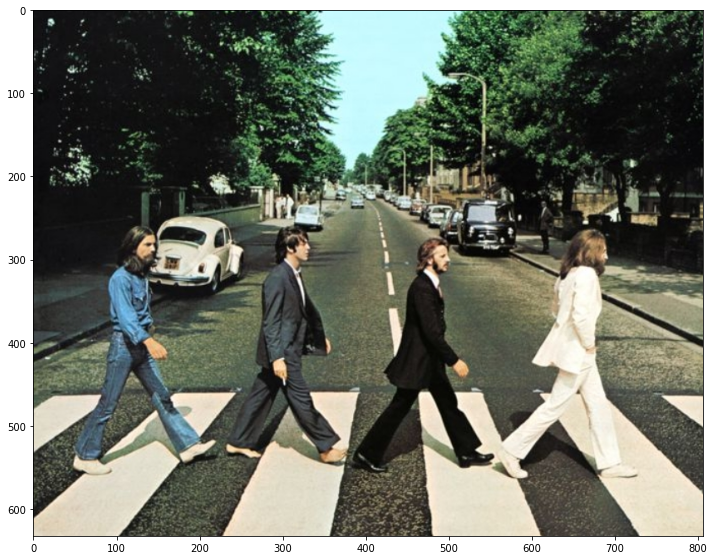

In [6]:
import cv2
import matplotlib.pyplot as plt

img=cv2.imread("/content/data/beatles01.jpg")
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(img.shape) # width : 806, height : 633
# (height,height)

plt.figure(figsize=(12,14))
plt.imshow(img_rgb)

In [7]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}


person : 0.9696
person : 0.9660
person : 0.8916
person : 0.6298
car : 0.8609
car : 0.7223
car : 0.7184
car : 0.7095
car : 0.5949
car : 0.5511
Detection 수행시간: 0.33 초


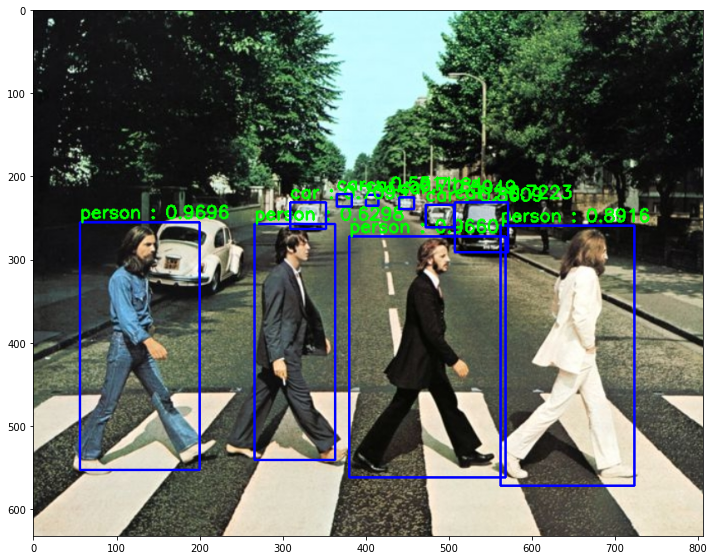

In [36]:
# 함수화
import time

def get_detected_img(img,cv_net,score_thre,is_caption,is_print):
  draw_img=img.copy()

  img_width=img.shape[1]
  img_height=img.shape[0]

  blob=cv2.dnn.blobFromImage(img,size=(300, 300),swapRB=True,crop=False)
  cv_net.setInput(blob)
  start = time.time()
  cv_out=cv_net.forward()

  for i in cv_out[0,0,:,:]:
    score=float(i[2])
    class_id=int(i[1])
    if score>score_thre:
      left=int(i[3]*img_width)
      top=int(i[4]*img_height)
      right=int(i[5]*img_width)
      bottom=int(i[6]*img_height)

      class_name=labels_to_names[class_id]

      caption="{} : {:.4f}".format(class_name,score)
      if is_caption:
        print(caption)

      cv2.rectangle(draw_img,(left,top),(right,bottom),color=(255,0,0),thickness=2)
      cv2.putText(draw_img,caption,(left,top-5),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)

  if is_print:
    print('Detection 수행시간:',round(time.time() - start, 2),"초")

  return draw_img

draw_img=get_detected_img(img,cv_net,0.5,True,True)
draw_img_rgb=cv2.cvtColor(draw_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,14))
plt.imshow(draw_img_rgb)

In [24]:
!wget -O ./data/street.png https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/images/street.png

--2022-06-21 06:54:05--  https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/images/street.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 730971 (714K) [image/png]
Saving to: ‘./data/street.png’

./data/street.png   100%[===================>] 713.84K  --.-KB/s    in 0.01s   

2022-06-21 06:54:05 (69.2 MB/s) - ‘./data/street.png’ saved [730971/730971]



person : 0.6176
car : 0.9615
car : 0.9473
car : 0.9457
car : 0.9357
car : 0.9294
car : 0.8221
traffic light : 0.3731
Detection 수행시간: 0.33 초


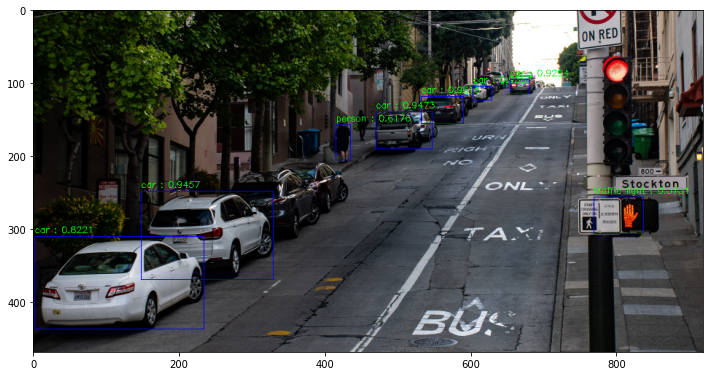

In [27]:
img_2=cv2.imread("/content/data/street.png")

draw_img=get_detected_img(img_2,cv_net,0.35,True,True)
draw_img_rgb=cv2.cvtColor(draw_img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,14))
plt.imshow(draw_img_rgb)

In [28]:
!wget -O ./data/car_person_bicycle.jpg https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/images/car_person_bicycle.jpg

--2022-06-21 06:56:34--  https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/images/car_person_bicycle.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59764 (58K) [image/jpeg]
Saving to: ‘./data/car_person_bicycle.jpg’

./data/car_person_b 100%[===================>]  58.36K  --.-KB/s    in 0.002s  

2022-06-21 06:56:34 (29.8 MB/s) - ‘./data/car_person_bicycle.jpg’ saved [59764/59764]



In [37]:
def do_detected_video(cv_net, input_path, output_path, score_threshold, is_print):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt )

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        
        returned_frame = get_detected_img(img_frame,cv_net,score_threshold,False,is_print)
        vid_writer.write(returned_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

In [ ]:
!wget -O ./data/Motorcycle.mp4 https://github.com/HyeBin-Hub/Lesson-Object_Detection/blob/main/videos/Motorcycle.mp4

In [39]:
do_detected_video(cv_net, "/content/data/Motorcycle.mp4", 
                  "/content/data/Motorcycle_out.mp4", 0.4, True)

총 Frame 갯수: 321
Detection 수행시간: 0.33 초
Detection 수행시간: 0.32 초
Detection 수행시간: 0.32 초
Detection 수행시간: 0.33 초
Detection 수행시간: 0.32 초
Detection 수행시간: 0.32 초
Detection 수행시간: 0.33 초
Detection 수행시간: 0.32 초
Detection 수행시간: 0.33 초
Detection 수행시간: 0.34 초
Detection 수행시간: 0.33 초
Detection 수행시간: 0.33 초
Detection 수행시간: 0.33 초
Detection 수행시간: 0.32 초
Detection 수행시간: 0.33 초
Detection 수행시간: 0.34 초
Detection 수행시간: 0.32 초
Detection 수행시간: 0.33 초
Detection 수행시간: 0.34 초
Detection 수행시간: 0.34 초
Detection 수행시간: 0.32 초
Detection 수행시간: 0.32 초
Detection 수행시간: 0.33 초
Detection 수행시간: 0.34 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.33 초
Detection 수행시간: 0.34 초
Detection 수행시간: 0.33 초
Detection 수행시간: 0.33 초
Detection 수행시간: 0.33 초
Detection 수행시간: 0.32 초
Detection 수행시간: 0.33 초
Detection 수행시간: 0.34 초
Detection 수행시간: 0.33 초
Detection 수행시간: 0.34 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.58 초
Detection 수행시간: 0.58 초
Detection 수행시간: 0.62 초
Detection 수행시간: 0.46 초
Detection 수행시간: 0.32 초
Detection 수행시간: 0.32 초
Detection 수행시간: 0.

# SSD+Mobilenet v3 Object Detection 수행.

In [11]:
!mkdir ./pretrained

!wget -O ./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz
!tar xvf ./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz -C ./pretrained/

!wget -O ./pretrained/ssd_mobilenet_config.pbtxt https://gist.githubusercontent.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7/raw/2a20064a9d33b893dd95d2567da126d0ecd03e85/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt

mkdir: cannot create directory ‘./pretrained’: File exists
--2022-06-21 06:39:15--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.65.80, 2607:f8b0:4004:832::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.65.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49318766 (47M) [application/gzip]
Saving to: ‘./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz’

./pretrained/ssd_mo 100%[===================>]  47.03M   122MB/s    in 0.4s    

2022-06-21 06:39:16 (122 MB/s) - ‘./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz’ saved [49318766/49318766]

ssd_mobilenet_v3_large_coco_2020_01_14/pipeline.config
ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.index
ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.data-00000-of-00001
ssd_mobilenet_v3_large_coco_2020_01_14/model.tflite
ssd_mobilenet_v3_la

In [41]:
!pip install opencv-python==4.5.2.54

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51.0 MB 258 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import cv2

config_file="/content/pretrained/ssd_mobilenet_config.pbtxt"
prtrained_file="/content/pretrained/ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb"

cv_net_m=cv_net=cv2.dnn_DetectionModel(prtrained_file,config_file)

cv_net_m.setInputSize(320,320)
cv_net_m.setInputScale(1.0/127.5)
cv_net_m.setInputMean((127.5,127.5,127.5))
cv_net_m.setInputSwapRB(True)

<dnn_Model 0x7f63a37b3310>

In [9]:
!wget -O ./data/image.png https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/images/image.png

--2022-06-21 07:38:36--  https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/images/image.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1217665 (1.2M) [image/png]
Saving to: ‘./data/image.png’

./data/image.png    100%[===================>]   1.16M  --.-KB/s    in 0.01s   

2022-06-21 07:38:36 (100 MB/s) - ‘./data/image.png’ saved [1217665/1217665]



In [10]:
img=cv2.imread("/content/data/image.png")

draw_img=img.copy()

classes,confidences,boxes=cv_net_m.detect(img,confThreshold=0.5)

In [11]:
classes,confidences,boxes

(array([[3],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [3],
        [1],
        [1]], dtype=int32), array([[0.8477544 ],
        [0.7434208 ],
        [0.69352335],
        [0.67220235],
        [0.58636266],
        [0.58018064],
        [0.5757018 ],
        [0.56981796],
        [0.53139293],
        [0.5272248 ],
        [0.5200112 ],
        [0.5126896 ]], dtype=float32), array([[ 118,  349,  537,  239],
        [ 925,  349,   44,  110],
        [ 806,  318,   40,  131],
        [ 769,  326,   38,  122],
        [  53,  344,   46,   66],
        [ 934,  347,   33,   87],
        [ 655,  321,   42,  128],
        [ 703,  323,   35,  122],
        [ 638,  341,   58,  131],
        [1022,  354,   53,   69],
        [ 110,  351,   42,   54],
        [ 460,  329,  116,  256]], dtype=int32))

In [12]:
classes.shape,confidences.shape,boxes.shape

((12, 1), (12, 1), (12, 4))

In [13]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

car : 0.8478 3 [118 349 537 239]
person : 0.7434 1 [925 349  44 110]
person : 0.6935 1 [806 318  40 131]
person : 0.6722 1 [769 326  38 122]
person : 0.5864 1 [ 53 344  46  66]
person : 0.5802 1 [934 347  33  87]
person : 0.5757 1 [655 321  42 128]
person : 0.5698 1 [703 323  35 122]
person : 0.5314 1 [638 341  58 131]
car : 0.5272 3 [1022  354   53   69]
person : 0.5200 1 [110 351  42  54]
person : 0.5127 1 [460 329 116 256]


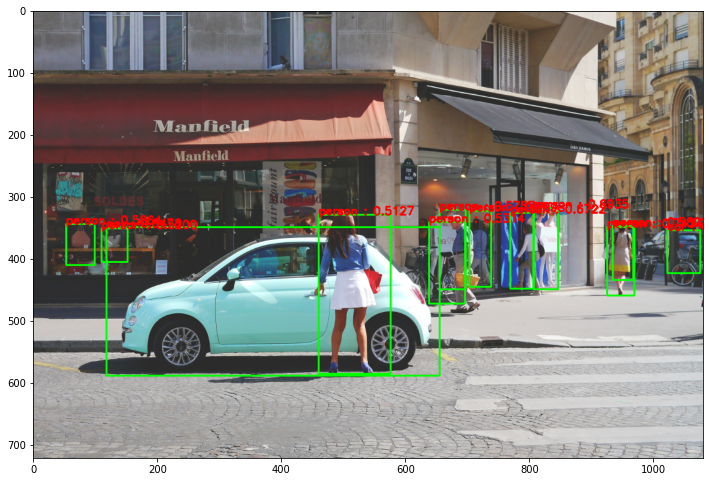

In [14]:
import matplotlib.pyplot as plt

green_color=(0, 255, 0)
red_color=(0, 0, 255)

for class_id,confidence_score,box in zip(classes.flatten(),confidences.flatten(),boxes):
  if confidence_score>0.5:
    caption="{} : {:.4f}".format(labels_to_names[class_id],confidence_score)
    cv2.rectangle(draw_img, (box[0], box[1]), (box[0]+box[2], box[1]+box[3]), color=green_color, thickness=2)
    cv2.putText(draw_img, caption, (box[0], box[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.6, red_color, 2)
    print(caption, class_id, box)  

draw_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(draw_img)


car : 0.8478
person : 0.7434
person : 0.6935
person : 0.6722
person : 0.5864
person : 0.5802
person : 0.5757
person : 0.5698
person : 0.5314
car : 0.5272
person : 0.5200
person : 0.5127


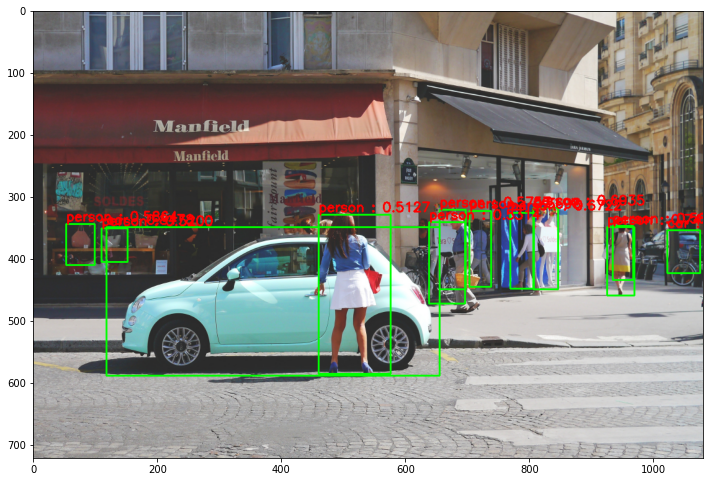

In [16]:
config_file="/content/pretrained/ssd_mobilenet_config.pbtxt"
pretrained_file="/content/pretrained/ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb"

cv_net=cv2.dnn_DetectionModel(pretrained_file,config_file)

cv_net.setInputSize(320,320)
cv_net.setInputMean((127.5,127.5,127.5))
cv_net.setInputScale(1.0/127.5)
cv_net.setInputSwapRB(True)

def get_detected_img(cv_net,img,score_threshold=0.5):

  draw_img=img.copy()

  classes,confidence_scores,bboxes=cv_net.detect(img,confThreshold=0.5)

  for class_id,confidence_score,bbox in zip(classes.flatten(),confidence_scores.flatten(),bboxes):
    if confidence_score > score_threshold :
      caption="{} : {:.4f}".format(labels_to_names[class_id],confidence_score)
      print(caption)
      cv2.rectangle(draw_img,(bbox[0],bbox[1]),(bbox[2]+bbox[0],bbox[3]+bbox[1]),color=(0,255,0),thickness=2)
      cv2.putText(draw_img,caption,(bbox[0],bbox[1]-5),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)

  return draw_img

img=cv2.imread("/content/data/image.png")

draw_img=get_detected_img(cv_net,img,score_threshold=0.5)
draw_img_rgb=cv2.cvtColor(draw_img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,14))
plt.imshow(draw_img_rgb)

In [18]:
!wget -O ./data/Traffic.mp4 https://github.com/HyeBin-Hub/Lesson-Object_Detection/blob/main/videos/Motorcycle.mp4?raw=true

--2022-06-21 07:45:07--  https://github.com/HyeBin-Hub/Lesson-Object_Detection/blob/main/videos/Traffic.mp4?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/HyeBin-Hub/Lesson-Object_Detection/raw/main/videos/Traffic.mp4 [following]
--2022-06-21 07:45:07--  https://github.com/HyeBin-Hub/Lesson-Object_Detection/raw/main/videos/Traffic.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/videos/Traffic.mp4 [following]
--2022-06-21 07:45:07--  https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/videos/Traffic.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githu

In [20]:
def get_detected_video(cv_net,input_video_path,output_detect_video_path,score_threshold):

  cap=cv2.VideoCapture(input_video_path)

  codec=cv2.VideoWriter_fourcc(*"XVID")

  video_fps=cap.get(cv2.CAP_PROP_FPS)

  video_size=(round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

  video_write=cv2.VideoWriter(output_detect_video_path,codec,video_fps,video_size)

  frame_cnt=cap.get(cv2.CAP_PROP_FRAME_COUNT)
  print(frame_cnt)

  while True:
    hasFrame, ImgFrame = cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break

    ImgFrame=get_detected_img(cv_net,ImgFrame,score_threshold=score_threshold)

    video_write.write(ImgFrame)

  cap.release()
  video_write.release()



In [24]:
get_detected_video(cv_net,
                   "/content/data/Motorcycle.mp4",
                   "/content/data/Motorcycle_out.mp4",
                   score_threshold=0.6)

321.0
person : 0.7590
person : 0.6453
person : 0.6319
person : 0.7262
person : 0.6154
person : 0.6152
person : 0.7384
person : 0.6336
person : 0.6208
person : 0.6143
person : 0.7186
person : 0.6562
car : 0.6076
person : 0.6076
person : 0.7124
car : 0.6498
person : 0.6227
person : 0.6127
person : 0.6120
motorcycle : 0.6044
person : 0.6806
car : 0.6453
person : 0.6269
person : 0.6151
person : 0.6988
car : 0.6624
motorcycle : 0.6551
person : 0.6269
person : 0.6040
person : 0.6472
person : 0.6421
person : 0.6407
person : 0.6398
car : 0.6395
motorcycle : 0.6217
person : 0.7029
car : 0.6423
person : 0.6367
person : 0.6358
person : 0.6349
motorcycle : 0.6325
person : 0.6984
person : 0.6473
car : 0.6393
person : 0.6286
motorcycle : 0.6282
person : 0.6257
motorcycle : 0.6756
person : 0.6364
person : 0.6363
car : 0.6185
person : 0.6182
motorcycle : 0.6007
motorcycle : 0.6617
person : 0.6330
person : 0.6250
car : 0.6127
person : 0.6012
motorcycle : 0.6369
person : 0.6284
person : 0.6281
person : 